In [89]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt
import matplotlib.image as img
import keras_ocr

In [115]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
receipt = os.getenv('HOME')+'/aiffel/ocr_python/Receipt_Dataset'
file_list = os.listdir(receipt)


입력값으로 들어갈 데이터는 영수증 이미지 데이터이다.

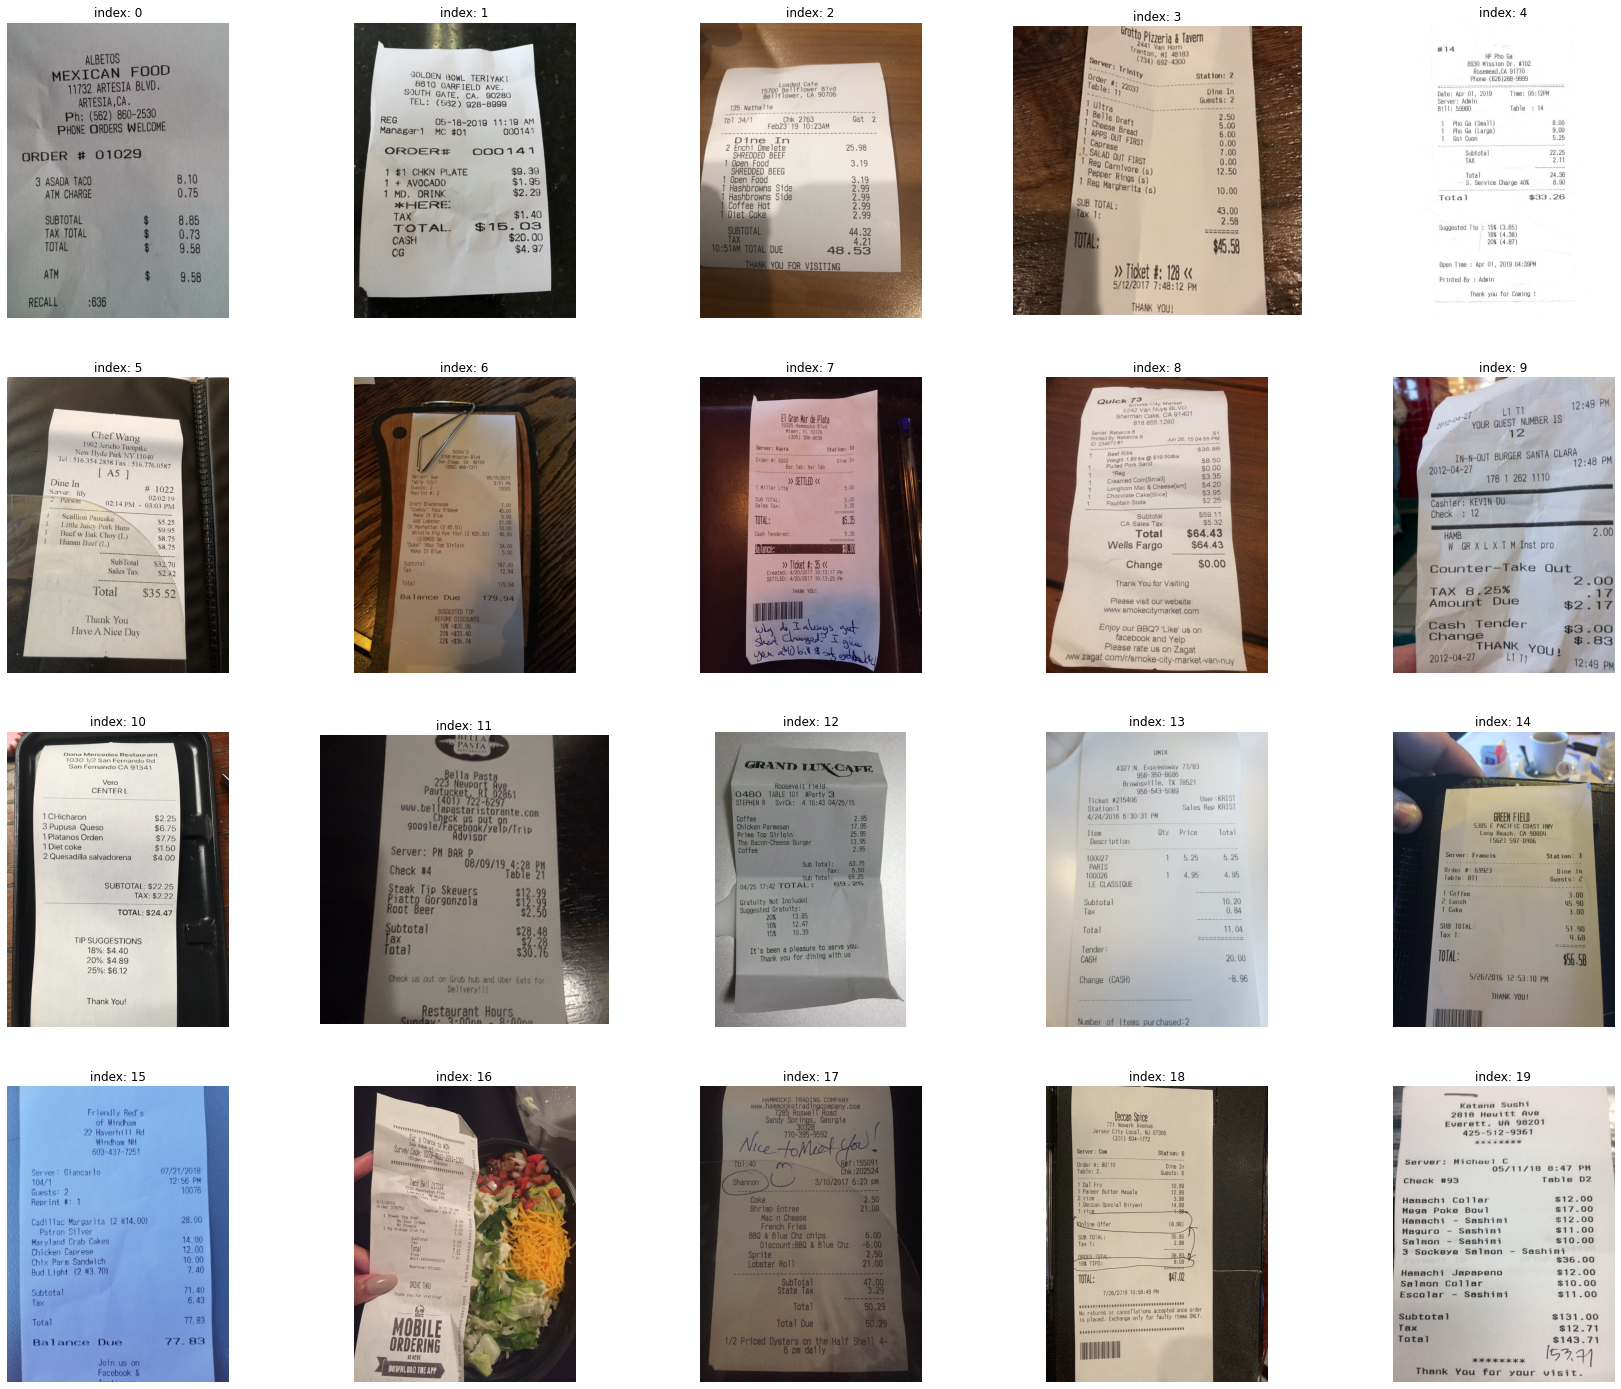

In [126]:
plt.figure(figsize=(30, 25))

for i in range(20):
    plt.subplot(4, 5, i+1)
    img_displayed = img.imread(receipt + '/' + file_list[i])
    plt.imshow(img_displayed)
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

# 1. Tesseract

In [40]:
def crop_word_regions(file, image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',   
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{os.path.splitext(file)[0][0:4]+str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [70]:
tesseract_output = os.getenv('HOME')+'/aiffel/ocr_python/Tesseract' 
cropped_image_path_list = []

for file in file_list:
    img_path = os.path.join(receipt, file)
    print(os.path.splitext(file)[0][0:4])
    cropped_image_path = crop_word_regions(file, img_path, tesseract_output)
    cropped_image_path_list.extend(cropped_image_path)

1013
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130000.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130001.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130002.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130003.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130004.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130005.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130006.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130007.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130008.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130009.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130010.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130011.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130012.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130013.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130014.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130015.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10130016.png
/home/aif

/home/aiffel0042/aiffel/ocr_python/Tesseract/10160000.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160001.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160002.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160003.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160004.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160005.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160006.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160007.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160008.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160009.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160010.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160011.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160012.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160013.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160014.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160015.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10160016.png
/home/aiffel00

/home/aiffel0042/aiffel/ocr_python/Tesseract/10080000.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080001.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080002.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080003.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080004.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080005.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080006.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080007.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080008.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080009.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080010.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080011.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080012.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080013.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080014.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080015.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10080016.png
/home/aiffel00

/home/aiffel0042/aiffel/ocr_python/Tesseract/10100000.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100001.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100002.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100003.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100004.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100005.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100006.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100007.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100008.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100009.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100010.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100011.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100012.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100013.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100014.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100015.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10100016.png
/home/aiffel00

1020
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200000.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200001.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200002.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200003.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200004.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200005.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200006.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200007.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200008.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200009.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200010.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200011.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200012.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200013.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200014.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200015.png
/home/aiffel0042/aiffel/ocr_python/Tesseract/10200016.png
/home/aif

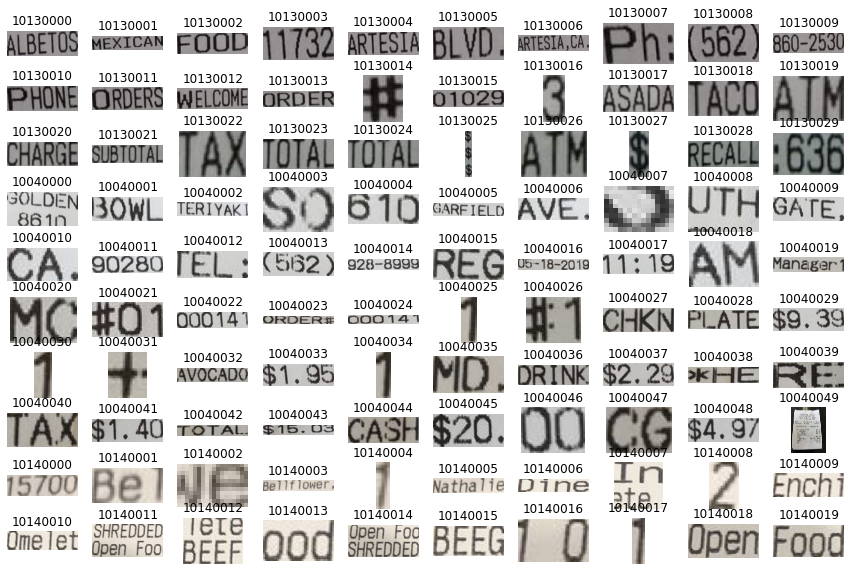

In [88]:
plt.figure(figsize=(15, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    img_displayed = img.imread(cropped_image_path_list[i])
    plt.imshow(img_displayed)
    plt.title(f'{cropped_image_path_list[i][-12:-4]}')
    plt.axis('off')
plt.show()

In [93]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list[0:100]:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

AL BETOs

MEXICAN

FOOD

11732

ARTESIA

BLVD.

ARTESIA,CA.

Pr:

(562)

860-2530

PHONE

ORDERS

la} ELCOME

ORDER


o1079

3

ASADA

TACU

ATM

CHARGE

SUBTOTAL

TAX

TOTAL

TOTAL

3

A] M

$

RECALL

‘B36

oo Rae

BOWL.

TERIYAK |

SO

one

GARFIELf)

AV .

. 2

UTR

GATE,

ee

QO27RBU

IEL :

(£52 )

978-8999

REG

O4:-18-20'9

1 Hie aa

AM

Manager 1

MC;

TO) 1

000 14 |

COFV IDE Ra

noo14 1)

7

1: |

CIHK IN

| ATE

$9, 39

1

+’

AVOCADO

$1.95

|

wiek

DR I NK.

$2.29

Kk |e

iS

TAX

$1.40

TOT AL.

G5. Os

CASH

620.

OU

CG

$4.9/


15700

Re |

1S

Bel/lf ower,

]

Natha!1é

rFI7Tne

aa

/

ENCN]

ime let

a

BEEE

N00

Be eancs

BEE

1 UJ

]

Upen

Food

Done


10130007, 10130012, 10130014, 10130015, 10130025, 10130026, 10130029, 10040000, 10040002, 10040004, 10040005, 10040006, ...   
이미지 화질이 안좋은 탓인걸까?

# 2. keras-ocr

In [96]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel0042/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel0042/.keras-ocr/crnn_kurapan.h5


In [116]:
images_path = [os.path.join(receipt, file) for file in file_list]
images = [keras_ocr.tools.read(im) for im in images_path]
predictions = [pipeline.recognize([im]) for im in images_path]

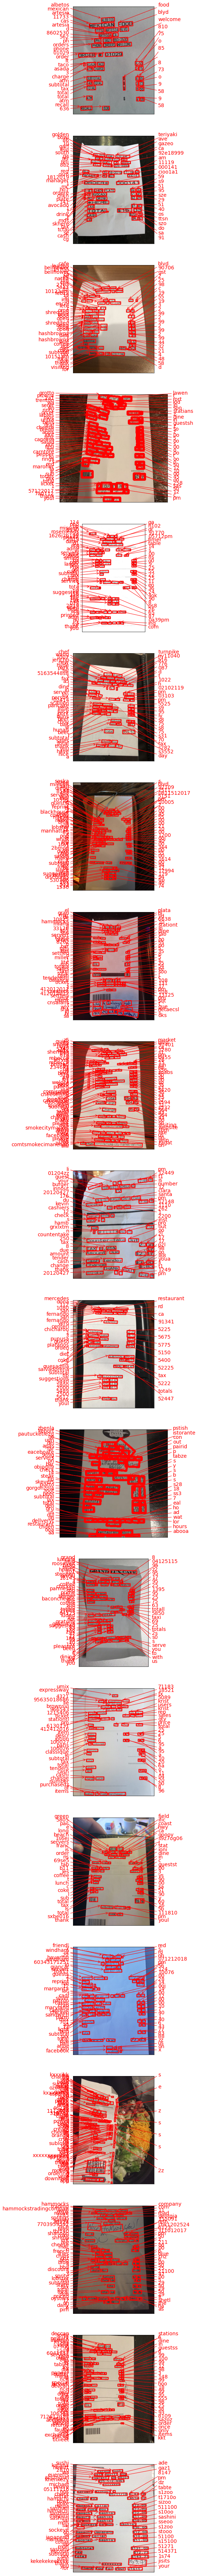

In [124]:
fig, axs = plt.subplots(nrows=len(images), figsize=(130,130))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=predictions[idx][0], ax=ax)

keras-ocr 라이브러리는 좋은 성능을 보여줬다. 하지만 여전히 결점들을 보여준다 (e.g. 기호들이 포함된 단어들을 잘못읽음, 대문자를 잘 인식하지 못함, etc) 